In [38]:
#import libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn import s

DEFINE DATASET


In [39]:
df=pd.read_csv("Expanded_data_with_more_features.csv")
print(df.head())   #SHURU KI VALUES DEKHAYEGA SRF

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [40]:
# EXPLORING THE DATA

df.describe()
df.info()
df.isnull().sum  #how many values are null?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


<bound method DataFrame.sum of        Unnamed: 0  Gender  EthnicGroup  ParentEduc  LunchType  TestPrep  \
0           False   False         True       False      False     False   
1           False   False        False       False      False      True   
2           False   False        False       False      False     False   
3           False   False        False       False      False     False   
4           False   False        False       False      False     False   
...           ...     ...          ...         ...        ...       ...   
30636       False   False        False       False      False     False   
30637       False   False        False       False      False     False   
30638       False   False         True       False      False     False   
30639       False   False        False       False      False     False   
30640       False   False        False       False      False     False   

       ParentMaritalStatus  PracticeSport  IsFirstChild  NrSiblings 

DROP UNNAMED COLUMN:  BCZ ZRURT NI HAI

In [41]:
df= df.drop("Unnamed: 0", axis=1)  #axis=1 means vertical axis
print(df.head())


   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


agr hamary pas aesy available huta 05-oct yani 5 sy 10 ghantay main change krna huta tu ye kam huga (change krny k lye) lkn abi hamary data main sahi dia wa.
TRANFORMATION:CHANGE (5-OCT) TO 5 TO 10 HOURS

CHANGE WEEKLY STUDY HOURS COLUMN:

In [42]:
# df["WklyStudyHours"]=df["WklyStudyHours"].str.replace("05-oct","5-10")  #replace funftion available in strings 


GENDER DISTRIBUTION:

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


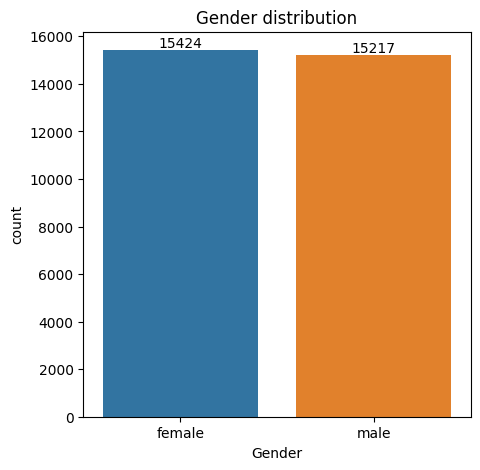

In [43]:
# IN SEABORN CHART/PLOT AVAILABLE TO COUNT VALUES. its NOT A BAR GRAPH

# male or female's chart:

# plt.figure(figsize=(3,3))    # for figure size
# sns.countplot(data=df,x="Gender")
# plt.show()

# IF WE WANT VALUES IN CHART:

plt.figure(figsize=(5,5))    # for figure size
ax=sns.countplot(data=df,x="Gender")  
ax.bar_label(ax.containers[0])  #to show values above bars
plt.title("Gender distribution")
plt.show()



#from the above chart we have analyzes that:
#the number of females in data is more than number of males 

  #groupby:
1.Pandas dataframe.groupby() function is used to split the data into groups based on some criteria.
2. This can be used to group large amounts of data and compute operations on these groups.
3.parameters:

In [44]:
#PARENTS KI EDUCATIN SY BACHON K SCORES PE KIA FRQ PRRHA
gb=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":"mean","WritingScore":"mean"})
print(gb)



                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


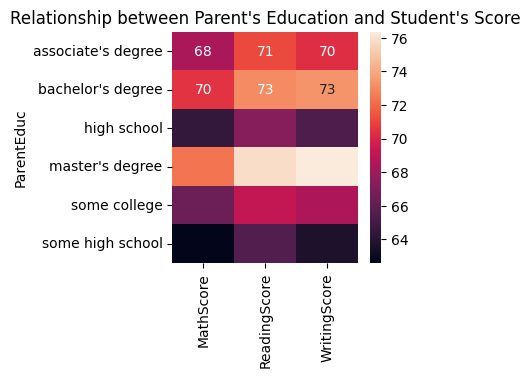

In [45]:
#heat map
#analyzed impact of parent education on children
plt.figure(figsize=(3,3))
plt.title("Relationship between Parent's Education and Student's Score")
sns.heatmap(gb,annot=True)   #through annot we show values
plt.show()

 from above chart we analyzed that:
 Education of parent has a good effect on children marks

In [46]:
#PARENTS K MARITAL STATUS SY BACHON K SCORES PE KIA FRQ PRRHA
gb1=df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":"mean","WritingScore":"mean"})
print(gb1)



                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


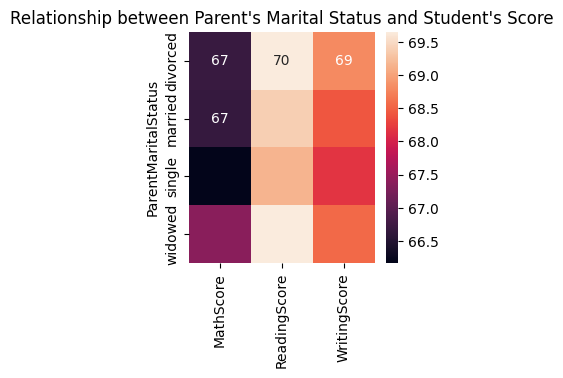

In [47]:
#IF CHART ABOVE VALUES:
#heat map
#analyzed impact of parent marital status on children marks
plt.figure(figsize=(3,3))
sns.heatmap(gb1,annot=True)   #through annot we show values
plt.title("Relationship between Parent's Marital Status and Student's Score")
plt.show()

from the above chart we conclude that there is neglegible impact OF marital status on chindren marks

HEAT MAP IS USED FOR RELATIONSHIPS


USING BOXPLOT TO ANALYZE outliers(EXTREME VALUES)
TO DETECT EXTREME VALUES:


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


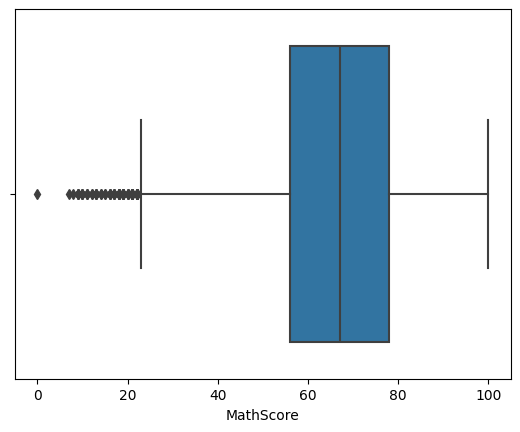

In [48]:
sns.boxplot(data=df,x="MathScore")
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


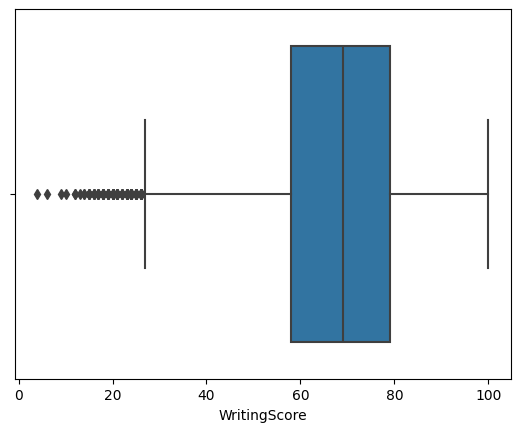

In [49]:
sns.boxplot(data=df,x="WritingScore")
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


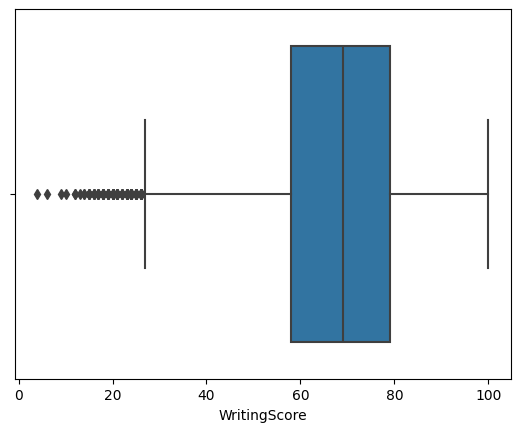

In [50]:
sns.boxplot(data=df,x="WritingScore")
plt.show()

1.Maths main students weak hain instead of reading and writing:
2.math is the difficult subject: bcz 0 pe buhat sy students arahy math score wly box plot main.
3.


DISTRIBUTION OF ETHNIC GROUP:
FIND UNIQUE VALUES:

In [51]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


[2219, 5826, 9212, 7503, 4041]


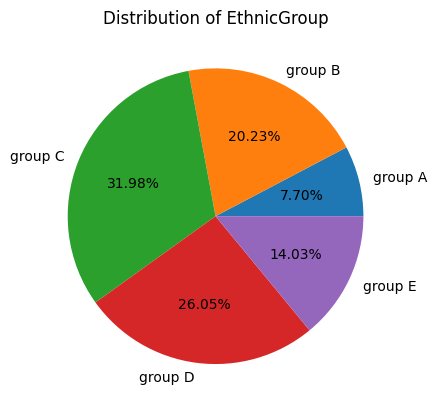

In [63]:
#distribution mtlb percentage distribution:(% distributon=pie chart)

groupA=df.loc[(df['EthnicGroup']=="group A")].count()    #to find count use pandas loc function:

groupB=df.loc[(df['EthnicGroup']=="group B")].count()    #to find count use pandas loc function:

groupC=df.loc[(df['EthnicGroup']=="group C")].count()    #to find count use pandas loc function:

groupD=df.loc[(df['EthnicGroup']=="group D")].count()    #to find count use pandas loc function:

groupE=df.loc[(df['EthnicGroup']=="group E")].count()    #to find count use pandas loc function:

# print(groupA["EthnicGroup"])   #gives value of groupA count

l=["group A", "group B", "group C","group D", 'group E']   #pie chart pr labels lagaye
mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]

print(mlist)    #same values when we check the values of groups.(Varification)

plt.pie(mlist,labels=l,autopct="%1.2f%%")    #autopct islye use huta k percentage show krskyn
plt.title("Distribution of EthnicGroup")
plt.show()

TO CHECK VALUES OF GROUPS:

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

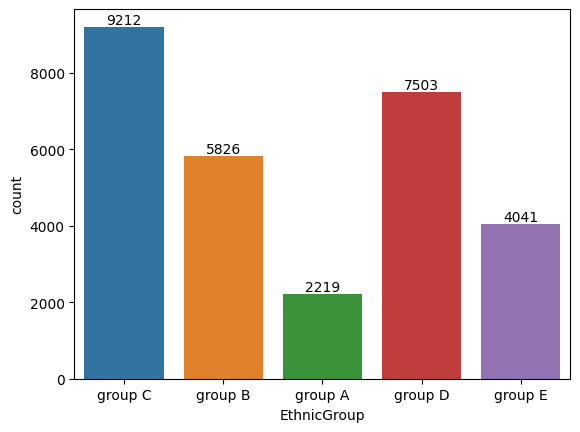

In [62]:
ax=sns.countplot(data=df,x='EthnicGroup')
ax.bar_label(ax.containers[0])